In [4]:
import pandas as pd
import numpy as np

# Load the files
df1 = pd.read_csv('final_submission.csv')
df2 = pd.read_csv('submission.csv')

# Drop any non-numeric columns (like IDs) if present
numeric_df1 = df1.select_dtypes(include=[np.number])
numeric_df2 = df2.select_dtypes(include=[np.number])

# Compute signed difference (submission1 - submission2)
signed_diff = numeric_df1 - numeric_df2

# Define "very close" using absolute + relative threshold
abs_diff = signed_diff.abs()
rel_diff = abs_diff / (numeric_df1.abs() + 1e-8)  # avoid division by zero
very_close_mask = (abs_diff < 0.05) | (rel_diff < 0.05)

# Fraction of "very close" values per row
row_similarity_fraction = very_close_mask.sum(axis=1) / very_close_mask.shape[1]

# Assign labels
labels = []
for frac in row_similarity_fraction:
    if frac >= 0.7:
        labels.append("Very Close")
    elif frac < 0.3:
        labels.append("Very Far")
    else:
        labels.append("Moderate")

# Build the report
report_df = df1.copy()
report_df['Comparison Label'] = labels
report_df['Row Similarity %'] = (row_similarity_fraction * 100).round(2)

# Append signed differences with prefix
diff_cols = signed_diff.add_prefix('Diff_')
report_df = pd.concat([report_df, diff_cols], axis=1)

# Save to CSV
report_df.to_csv('comparison_report_signed.csv', index=False)

# Print summary
label_counts = pd.Series(labels).value_counts()
print("✅ Signed comparison complete. Results saved to 'comparison_report_signed.csv'.")
print("\n📊 Summary:")
print(label_counts)


FileNotFoundError: [Errno 2] No such file or directory: 'final_submission.csv'

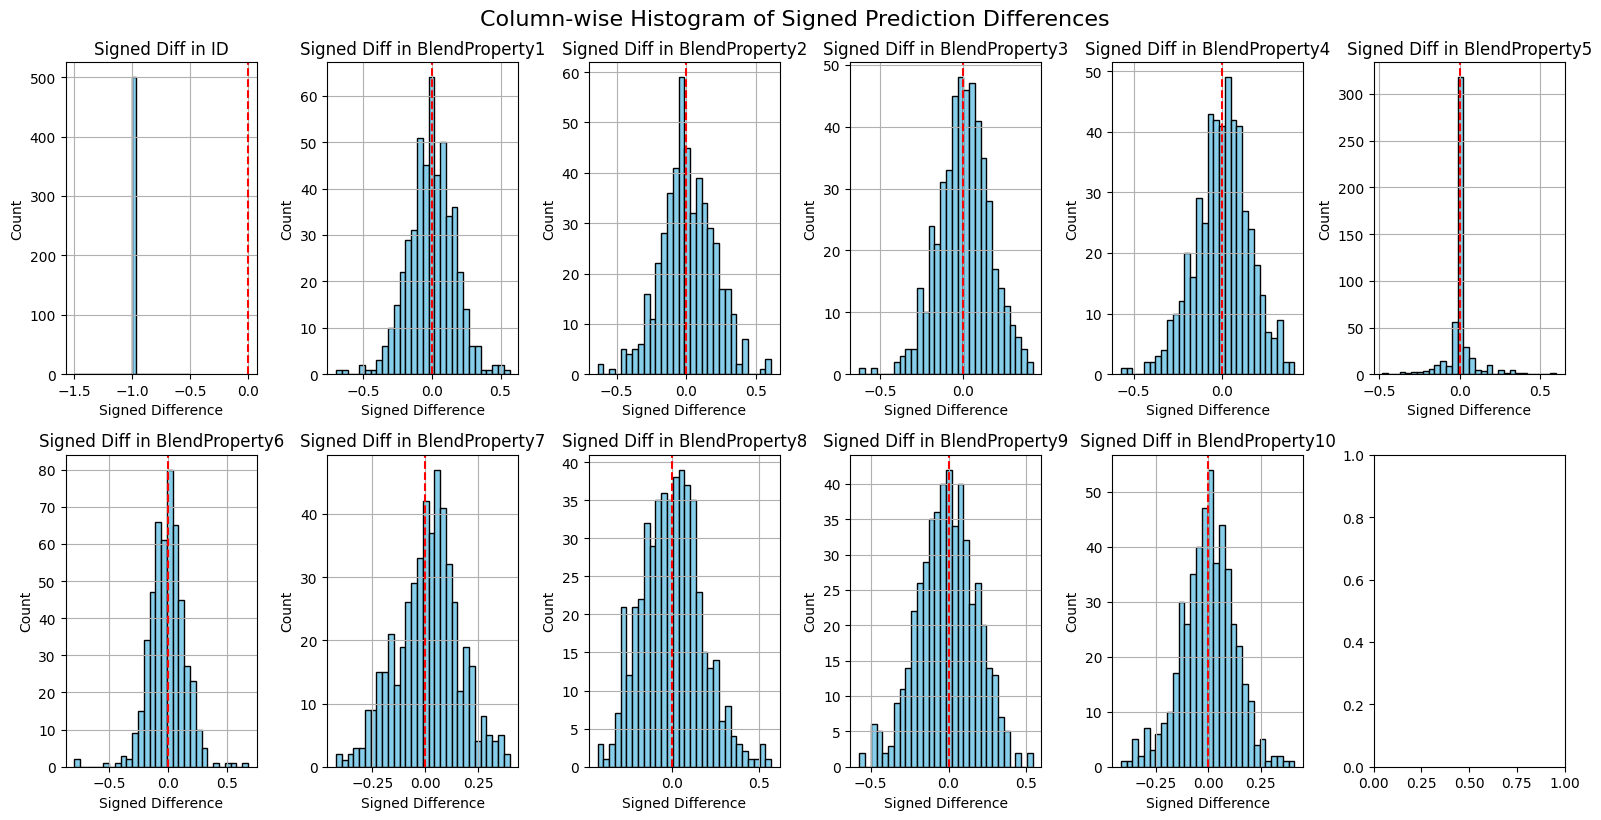

In [ ]:
import matplotlib.pyplot as plt

# Plot signed difference histograms
num_cols = signed_diff.shape[1]
fig, axs = plt.subplots(nrows=2, ncols=(num_cols + 1) // 2, figsize=(16, 8))
axs = axs.flatten()

for i, col in enumerate(signed_diff.columns):
    axs[i].hist(signed_diff[col], bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Signed Diff in {col}')
    axs[i].set_xlabel('Signed Difference')
    axs[i].set_ylabel('Count')
    axs[i].axvline(0, color='red', linestyle='--')  # reference line at 0
    axs[i].grid(True)

plt.tight_layout()
plt.suptitle("Column-wise Histogram of Signed Prediction Differences", fontsize=16, y=1.02)
plt.show()


In [ ]:
import pandas as pd

# Load submissions
df1 = pd.read_csv('final_submission.csv')
df2 = pd.read_csv('submission.csv')

# Take the mean of corresponding values
average_df = (df1 + df2) / 2

# Round for cleanliness if needed (optional)
average_df = average_df.round(6)

# Save to CSV
average_df.to_csv('average_submission.csv', index=False)

print("✅ Averaged submission saved to 'average_submission.csv'.")


✅ Averaged submission saved to 'average_submission.csv'.


/var/folders/pj/11xmc7n97c79h49thvh8mmh40000gp/T/ipykernel_39754/3299755163.py:45: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xDAyN/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


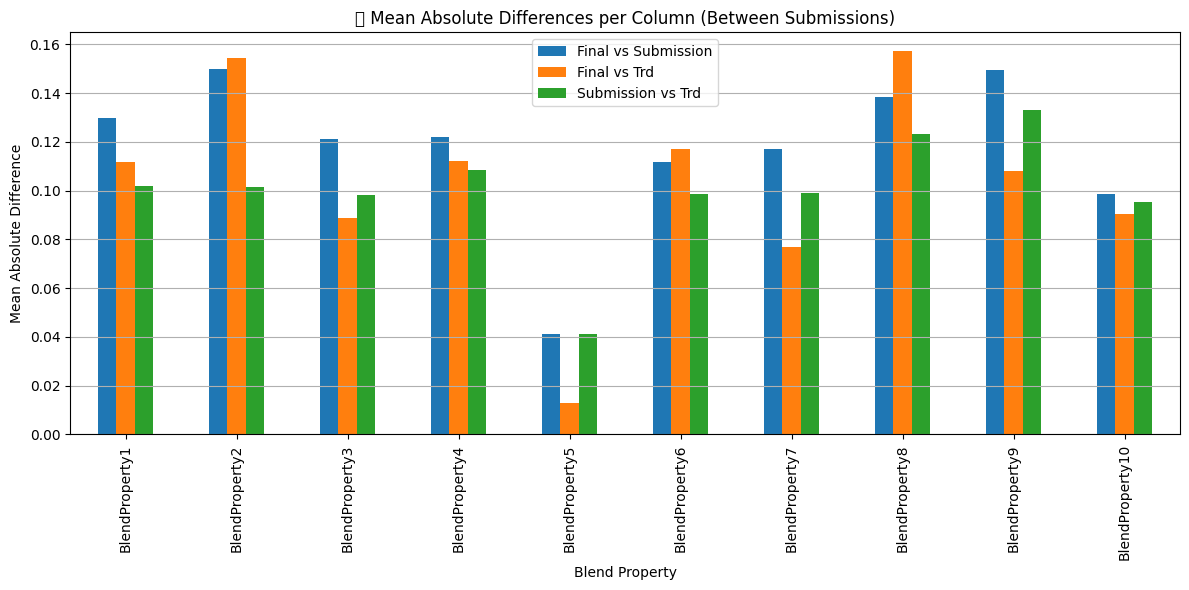

/var/folders/pj/11xmc7n97c79h49thvh8mmh40000gp/T/ipykernel_39754/3299755163.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xDAyN/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


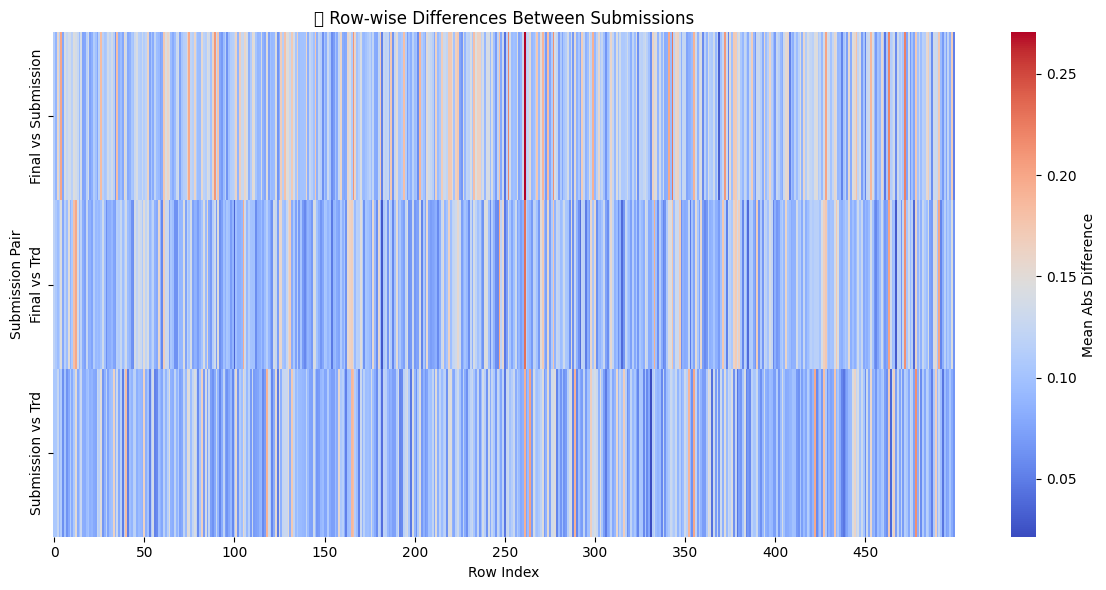

/var/folders/pj/11xmc7n97c79h49thvh8mmh40000gp/T/ipykernel_39754/3299755163.py:86: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xDAyN/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


📊 Summary of Mean Differences (All Columns):
Final vs Submission    0.117889
Final vs Trd           0.102942
Submission vs Trd      0.100099
dtype: float64


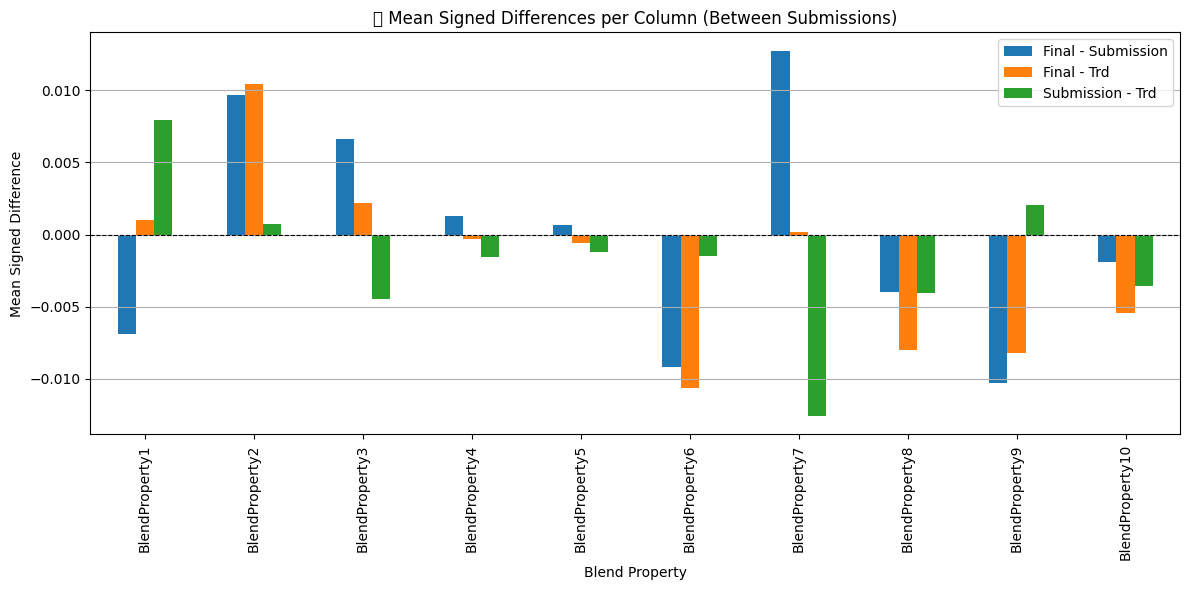

/var/folders/pj/11xmc7n97c79h49thvh8mmh40000gp/T/ipykernel_39754/3299755163.py:103: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xDAyN/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


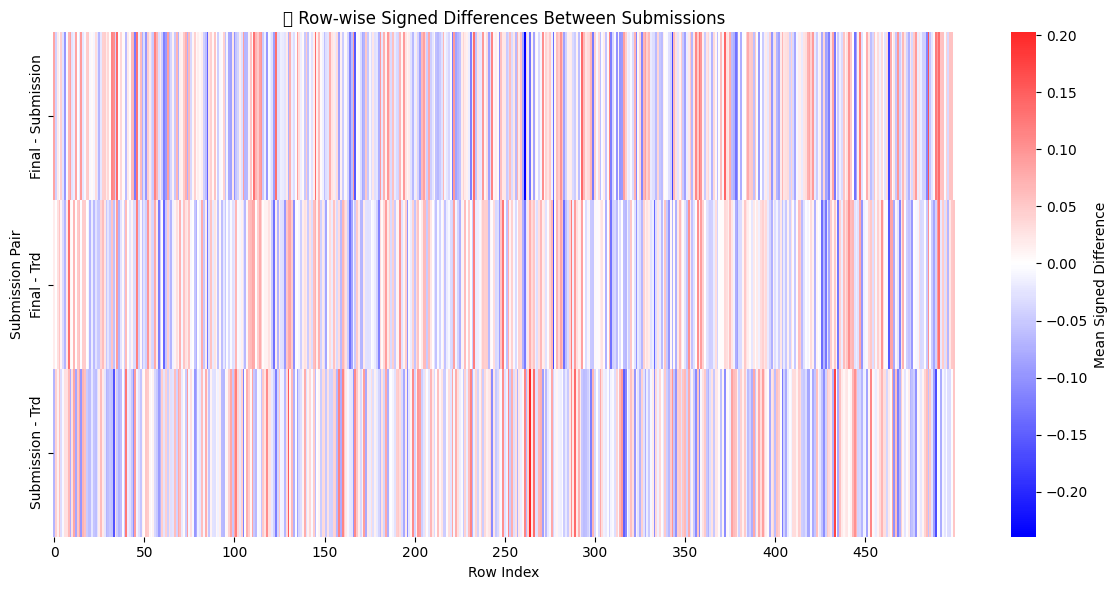

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load submissions
final_df = pd.read_csv('/Users/xDAyN/Desktop/cs project/Project Shell.ai Hackathon/final_submission.csv')
submission_df = pd.read_csv('/Users/xDAyN/Desktop/cs project/Project Shell.ai Hackathon/submission.csv')
trd_df = pd.read_csv('/Users/xDAyN/Desktop/cs project/Project Shell.ai Hackathon/submission_top250_features.csv')

# Keep only numeric columns
final = final_df.select_dtypes(include=[np.number])
sub = submission_df.select_dtypes(include=[np.number])
trd = trd_df.select_dtypes(include=[np.number])

# Drop non-numeric columns and 'id' if present
def drop_non_features(df):
    numeric = df.select_dtypes(include=[np.number])
    return numeric.drop(columns=[col for col in numeric.columns if 'id' in col.lower()], errors='ignore')

final = drop_non_features(final_df)
sub = drop_non_features(submission_df)
trd = drop_non_features(trd_df)


# Compute pairwise absolute differences
diff_final_vs_sub = (final - sub).abs()
diff_final_vs_trd = (final - trd).abs()
diff_sub_vs_trd = (sub - trd).abs()

# --------------------------
# 1. Mean difference per column (bar plot)
# --------------------------
mean_diffs = pd.DataFrame({
    'Final vs Submission': diff_final_vs_sub.mean(),
    'Final vs Trd': diff_final_vs_trd.mean(),
    'Submission vs Trd': diff_sub_vs_trd.mean()
})

mean_diffs.plot(kind='bar', figsize=(12, 6))
plt.title('📊 Mean Absolute Differences per Column (Between Submissions)')
plt.ylabel('Mean Absolute Difference')
plt.xlabel('Blend Property')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --------------------------
# 2. Row-wise difference heatmap
# --------------------------
row_diffs = pd.DataFrame({
    'Final vs Submission': diff_final_vs_sub.mean(axis=1),
    'Final vs Trd': diff_final_vs_trd.mean(axis=1),
    'Submission vs Trd': diff_sub_vs_trd.mean(axis=1)
})

plt.figure(figsize=(12, 6))
sns.heatmap(row_diffs.T, cmap='coolwarm', cbar_kws={'label': 'Mean Abs Difference'}, xticklabels=50)
plt.title('📈 Row-wise Differences Between Submissions')
plt.xlabel('Row Index')
plt.ylabel('Submission Pair')
plt.tight_layout()
plt.show()

# --------------------------
# 3. Print summary stats
# --------------------------
print("📊 Summary of Mean Differences (All Columns):")
print(mean_diffs.mean().round(6))

# --------------------------
# 4. Mean signed differences per column (bar plot)
# --------------------------
signed_mean_diffs = pd.DataFrame({
    'Final - Submission': (final - sub).mean(),
    'Final - Trd': (final - trd).mean(),
    'Submission - Trd': (sub - trd).mean()
})

signed_mean_diffs.plot(kind='bar', figsize=(12, 6))
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('📊 Mean Signed Differences per Column (Between Submissions)')
plt.ylabel('Mean Signed Difference')
plt.xlabel('Blend Property')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --------------------------
# 5. Row-wise signed differences (heatmap)
# --------------------------
signed_row_diffs = pd.DataFrame({
    'Final - Submission': (final - sub).mean(axis=1),
    'Final - Trd': (final - trd).mean(axis=1),
    'Submission - Trd': (sub - trd).mean(axis=1)
})

plt.figure(figsize=(12, 6))
sns.heatmap(signed_row_diffs.T, cmap='bwr', center=0, cbar_kws={'label': 'Mean Signed Difference'}, xticklabels=50)
plt.title('📈 Row-wise Signed Differences Between Submissions')
plt.xlabel('Row Index')
plt.ylabel('Submission Pair')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Load both CSVs
submission = pd.read_csv('submission.csv')
final = pd.read_csv('final_submission.csv')

# Ensure structure matches
assert submission.shape == final.shape, "Shape mismatch between submissions"
assert all(submission.columns == final.columns), "Column mismatch between submissions"

# Perform weighted average
weighted_avg = 0.55 * submission + 0.45 * final

# Optional: round to clean decimals
weighted_avg = weighted_avg.round(6)

# Save the result
weighted_avg.to_csv('weighted_average_submission.csv', index=False)

print("✅ Weighted average saved to 'weighted_average_submission.csv'")


✅ Weighted average saved to 'weighted_average_submission.csv'
